In [5]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('kyphosis.csv')

In [7]:
#Age is in months
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


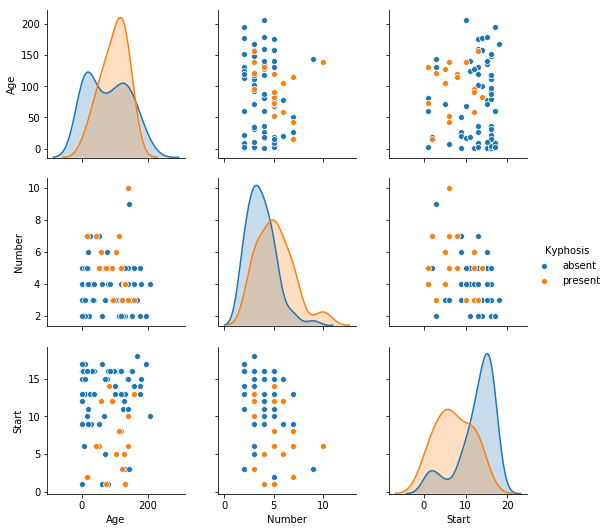

In [9]:
sns.pairplot(df, hue='Kyphosis')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Kyphosis', axis=1)

In [14]:
y = df['Kyphosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[13  7]
 [ 4  1]]


              precision    recall  f1-score   support

      absent       0.76      0.65      0.70        20
     present       0.12      0.20      0.15         5

    accuracy                           0.56        25
   macro avg       0.44      0.43      0.43        25
weighted avg       0.64      0.56      0.59        25



In [36]:
#Tree visualization

from IPython.display import Image  
#from sklearn.externals.six import StringIO 
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

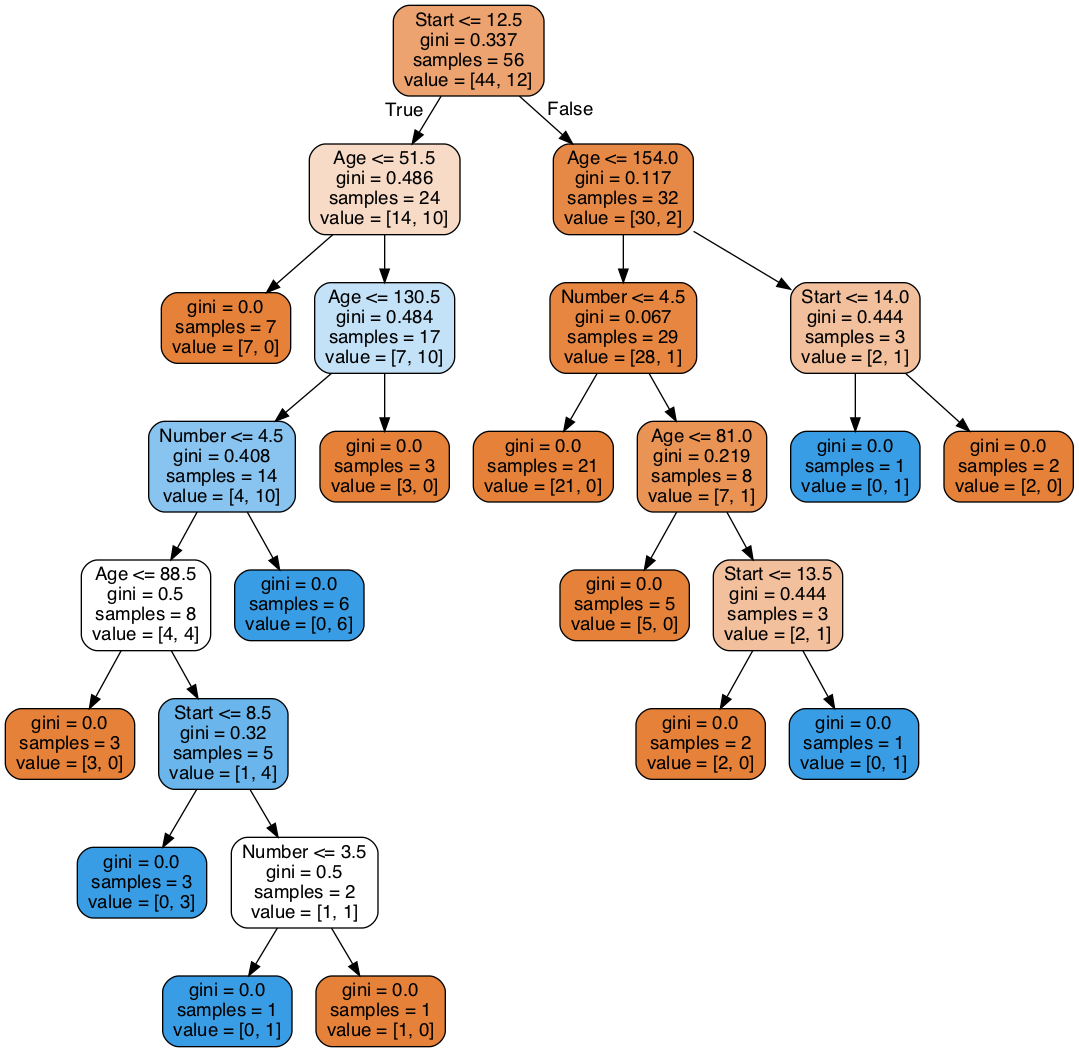

In [37]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators=200)

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

[[20  0]
 [ 4  1]]


              precision    recall  f1-score   support

      absent       0.83      1.00      0.91        20
     present       1.00      0.20      0.33         5

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25

